#  Examples 3 -- Particle Equilibrium

Contents:
- [A. Object on a ramp](#A)
- [B. Failure limit](#B)
- [C. Simple spring](#C)
- [D. Simple spring 2](#D)             
- [E. Multiple springs](#E)             
- [F. 3D equilibrium ](#F)               
- [G. 3D equilibrium (2)](#G)                           


In [1]:
from numpy import *
dtr = pi/180  # factor for degree-to-radian conversion

<a name="A"></a>

## A. Object on a ramp

<img src="images/P3-25.png" />

In [2]:
x1,x2 = 0.8,3.9     # m; left-to-right
y1,y2 = 1.6,2.1     # m; bottom, top
W = 260.0                        # N
f = 3./4                         # fraction of distance from D to E
rBD = array((    x1,    -y2 ))   # m
rBE = array(( x1+x2, -y1-y2 ))   # m

In [3]:
rED = rBD - rBE
rEC = (1-f)*rED
rBC = rBE + rEC
uCB = -rBC / sqrt(sum(rBC**2))
# find unit vector perp. to ramp (and upward)
uED = rED / sqrt(sum(rED**2))
uperp = array((uED[1],-uED[0]))
print ('verify that we have uperp correct:')
print ('    uperp=',uperp)
print ('    uperp.uED=',dot(uperp,uED))
print ('    mag of uperp=',sqrt(sum(uperp**2)))
arctan(uCB[1]/uCB[0])*180/pi

verify that we have uperp correct:
    uperp= [0.37955636 0.92516862]
    uperp.uED= 0.0
    mag of uperp= 1.0


-41.53792694386491

Force balancing gives

$$\sum \vec{F}_i = T_{ABC} \hat{u}_{CB} - W\hat{\jmath} + R \hat{u}_{perp} =0$$

Now we have two equations and two unknowns $T_{ABC}$ and $R$.

In [4]:
import sympy as s
# define symbolic variables:
Ts,Rs = s.symbols('Ts,Rs')
# construct the equation that equals zero:
eq = Ts*uCB - W*array((0.,1)) + Rs*uperp
print (eq)

[0.379556356256306*Rs - 0.748516935361959*Ts
 0.925168618374746*Rs + 0.663115674280393*Ts - 260.0]


In [5]:
ss = s.solve( [eq[0],eq[1]], [Ts,Rs])
print (ss)

{Ts: 104.517331348682, Rs: 206.116934320280}


<a name="B"></a>

## B. Failure limit

<img src="images/P3-40.png" />

In [6]:
T_AB_lim = 270.     # lb
T_other_lim = 495.  # lb
F_EC_lim = 650.     # lb
uCD = array(( 12., 5)) / sqrt(12**2+5**2)
uEC = array((-24., 7)) / sqrt(24**2+7**2)

Need to solve two equations with two unknowns:

$$-(W+F)\hat{\jmath}  + F_{EC} \hat{u}_{EC} + T_{CD} \hat{u}_{CD} =0$$

Where $F=\tfrac{1}{2}W$. The $x$ components yield

$$F_{EC} = - T_{CD} \frac{u_{CDx}}{ u_{ECx}}$$

And the $y$ components yield

$$F_{EC} =  \frac{-T_{CD} u_{CDy} + \tfrac{3}{2}W}{ u_{ECy}}$$

Then

$$-T_{CD} \frac{ u_{CDx} }{ u_{ECx}} u_{ECy} = -T_{CD} u_{CDy} +\tfrac{3}{2}W$$

So

$$T_{CD} = \frac{ \tfrac{3}{2}W }{ u_{CDy} - \frac{ u_{CDx} }{ u_{ECx}} u_{ECy} }$$

This along with the $x$ component equation give both unknowns.

In [7]:
W = arange(100.,1e3,1)
T_AB = 0.5*W
T_CB = W
T_CD = 1.5*W / (uCD[1]-uCD[0]*uEC[1]/uEC[0])
F_EC = -T_CD*uCD[0]/uEC[0]

Text(0, 0.5, 'member force (lb)')

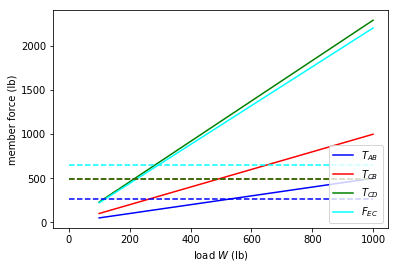

In [8]:
from matplotlib.pyplot import *
%matplotlib inline
plot( W, T_AB, label= '$T_{AB}$',  color='blue')
plot( W, T_CB, label= '$T_{CB}$',  color='red')
plot( W, T_CD, label= '$T_{CD}$',  color='green')
plot( W, F_EC, label= '$F_{EC}$',  color='cyan')
# plot force limits:
W_max = W[-1]
plot( (0,W_max), (T_AB_lim,T_AB_lim),       color ='blue', linestyle="--")
plot( (0,W_max), (T_other_lim,T_other_lim), color ='red', linestyle="--")
plot( (0,W_max), (T_other_lim,T_other_lim), color ='green', linestyle="--")
plot( (0,W_max), (F_EC_lim,F_EC_lim),       color ='cyan', linestyle="--")
legend(loc='lower right')
xlabel('load $W$ (lb)')
ylabel('member force (lb)')

Looks like cable $CD$ will fail first. Solve for $W$ when $T_{CD}$ is set to equal its limit.

In [9]:
W_lim = T_other_lim/1.5 * (uCD[1]-uCD[0]*uEC[1]/uEC[0])
print ('largest weight W that may be lifted is',W_lim,'lb')

largest weight W that may be lifted is 215.7692307692308 lb


<a name="C"></a>

## C. Simple spring

<img src="images/P3-57.png" />

In [10]:
Q = 35. *dtr           # theta, radians
k = 23.                # lb/ft
X = 4.0                # ft
La,Lb,Lc = X, 3, 5     # unstretched length, ft, for parts a,b,c

Solution will equal the vertical component of the spring force $\vec{F}_s$.

In [11]:
rAB = array(( -X, X*tan(Q) ))
rAB_mag = sqrt(sum(rAB**2))
uAB = rAB / rAB_mag
# part a
L0 = La                       # unstretched length, ft
Fs = k*(rAB_mag - L0) * uAB   # force (vector) of spring on A
print ('for unstretched length=',L0,'ft, vertical component of Fs=',Fs[1],'lb')
# part b
L0 = Lb                       # unstretched length, ft
Fs = k*(rAB_mag - L0) * uAB   # force (vector) of spring on A
print ('for unstretched length=',L0,'ft, vertical component of Fs=',Fs[1],'lb')
# part c
L0 = Lc                       # unstretched length, ft
Fs = k*(rAB_mag - L0) * uAB   # force (vector) of spring on A
print ('for unstretched length=',L0,'ft, vertical component of Fs=',Fs[1],'lb')

for unstretched length= 4.0 ft, vertical component of Fs= 11.650061370997058 lb
for unstretched length= 3 ft, vertical component of Fs= 24.842319407071116 lb
for unstretched length= 5 ft, vertical component of Fs= -1.5421966650770018 lb


<a name="D"></a>

## D. Simple spring 2

<img src="images/P3-67.png" />

In [12]:
k = 229.   # N/mm
L0 = 343.  # mm
X = 209.   # mm
Y = 169.   # mm

(a)

In [13]:
rCA = array((X,-Y))
rCA_mag = sqrt(sum(rCA**2))
print( 'compare hypontenuse',rCA_mag,'to unstretched length',L0)
uCA = rCA / rCA_mag
FCA = k*(L0-rCA_mag)*uCA     # spring force (vector), N
P = -FCA[1]
TAB = -FCA[0]
print ('solution:')
print ('    vertical component of force P=',P,'N')
print ('    force in AB (magnitude)=',abs(TAB),'N')

compare hypontenuse 268.77871939571406 to unstretched length 343.0
solution:
    vertical component of force P= 10686.99853591264 N
    force in AB (magnitude)= 13216.465645004388 N


(b) Assume the origin is at point $B$.

Find the angle $\theta$ between member $AB$ and the vertical with the law of cosines:

$$L_0^2 = X^2 + Y^2 - 2XY \cos \theta$$

$$\theta = \cos^{-1} \frac{X^2 + Y^2 - L_0^2}{2XY} $$

<img src="images/P3-67a.jpg" style="height:200px;" />

In [14]:
Q = arccos( (X**2+Y**2-L0**2)/(2*X*Y) )
xA = X*sin(Q)
yA = X*cos(Q)
print ('xA,yA=',xA,'mm,',yA,'mm')

xA,yA= 160.10528038464116 mm, -134.34023668639054 mm


<a name="E"></a>

## E. Multiple springs

<img src="images/P3-73.png" />

In [15]:
mA,mB = 49., 84.           # kg
k1,k2,k3 =  104.,122.,145.  # N/mm
g = 9.81                   # N/kg

Define upward to be the $+y$ direction.  The free body diagrams of each mass are shown below. For diagram purposes, the spring forces are assumed to all be in extension; actual spring force directions may be opposite the vector directions shown. 

<img src="images/P3-73a.png"  style="height:200px;"  />

The values of $\delta_A$ and $\delta_B$ are considered positive when the displacement is as shown in the figure in the problem definition. Weight vectors are given by $\vec{W}_A=-m_A g \hat{\jmath}$ and $\vec{W}_B=-m_B g \hat{\jmath}$.

Define the force by spring 1 on mass A as $\vec{F}_{1A} = k_1 \delta_A \hat{\jmath} $. This force is in the $\hat{\jmath}$ direction when $\delta_A$ is positive (i.e., when spring 1 is extended).

Define the force by spring 2 on mass A as $\vec{F}_{2A} = k_2 (\delta_A -\delta_B ) \hat{\jmath} $. This force is in the $\hat{\jmath}$ direction when $\delta_A>\delta_B$ (i.e., when spring 2 is compressed).

Define the force by spring 2 on mass B as $\vec{F}_{2B} = -k_2 (\delta_A -\delta_B ) \hat{\jmath} $. This force is in the $-\hat{\jmath}$ direction when $\delta_A>\delta_B$ (i.e., when spring 2 is compressed).

Define the force by spring 3 on mass B as $\vec{F}_{3B} = k_3 \delta_B \hat{\jmath} $. This force is in the $\hat{\jmath}$ direction when $\delta_B$ is positive (i.e., when spring 3 is compressed).

Now force sums in the $y$ direction yeild (for mass A and B, respectively)

$$ k_1 \delta_A + k_2 (\delta_A -\delta_B ) -m_A g = 0 $$


$$ - k_2 (\delta_A -\delta_B ) + k_3 \delta_B - m_B g = 0 $$

This can be written in matrix form:

$$\begin{bmatrix}
k_1+k_2 & -k_2\\ 
-k_2    &  k_2+k_3
\end{bmatrix}
\begin{bmatrix} \delta_A \\ \delta_B \end{bmatrix}=
\begin{bmatrix}   m_A g  \\   m_B g  \end{bmatrix}
$$

This is solved with a [linalg](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html) routine as follows.

In [16]:
CC = array((( k1+k2,   -k2 ),
            (   -k2, k2+k3 ) ))
SS = array(( mA*g, mB*g ))
solution = linalg.solve(CC,SS)
deltaA, deltaB = solution[0], solution[1]

Now the forces can be calculated as defined above.

In [17]:
print ('spring extensions (positive down):')
print ('    delta A=',deltaA,'mm')
print ('    delta B=',deltaB,'mm')
print ('force supported by each spring (negative in compression):')
print ('    F1=',k1*deltaA,'N')
print ('    F2=',k2*(deltaB-deltaA),'N')
print ('    F3=',-k3*deltaB,'N')


spring extensions (positive down):
    delta A= 5.034913766553743 mm
    delta B= 5.386889436402834 mm
force supported by each spring (negative in compression):
    F1= 523.6310317215892 N
    F2= 42.94103172158913 N
    F3= -781.0989682784109 N


<a name="F"></a>

## F. 3D equilibrium


<img src="images/P3-104.png" />

In [18]:
x,y,z = 12.,6.,5.     # ft
W =  800.             # lb

Force sum:

$$-W \hat{k} + F_{AB} \hat{u}_{AB} + F_{AC} \hat{u}_{AC} + R \hat{u}_\perp = 0$$

Symmetry requires that $ F_{AB}= F_{AC}=T$. So we have 3 equations and 2 unknowns ($T$ and $R$):

$$-W \hat{k} + T \left (\hat{u}_{AB} + \hat{u}_{AC}  \right ) + R \hat{u}_\perp = 0$$

In [19]:
rAB = array(( x, -y, z))
rAC = array((-x, -y, z))
uAB = rAB/sqrt(sum(rAB**2))
uAC = rAC/sqrt(sum(rAC**2))
rperp = cross(uAC,uAB)
uperp = rperp/sqrt(sum(rperp**2))
uz = array((0.,0,1))

In [20]:
import sympy as s
# define symbolic variables:
Ts,Rs = s.symbols('Ts,Rs')
# construct the equation that equals zero:
eq = -W*uz + Ts*(uAB+uAC) + Rs*uperp 
print (eq[0])
print (eq[1])
print (eq[2])

0
0.64018439966448*Rs - 0.838116354923494*Ts
0.768221279597376*Rs + 0.698430295769578*Ts - 800.0


There is nothing going on the $x$ direction, so solve the other two equations.

In [21]:
ss = s.solve( [eq[1],eq[2]], [Ts,Rs])
T = float(ss[Ts])
R = float(ss[Rs])
print ('R=',R,'lb')
print ('F_AB=F_AC=',T,'lb')

R= 614.5770236779007 lb
F_AB=F_AC= 469.4367561729952 lb


<a name="G"></a>

## G. 3D equilibrium (2)


<img src="images/P3-110.png" />

In [22]:
WE = 50.0                      # lb
xD,yD = 5, 14                  # in
rOA = array(( 0.,  0., 8. ))   # in
rOB = array(( 0.,  6., 0. ))   # in
rOD = array(( xD,  yD, 0. ))   # in
lAC = 5                        # in

In [23]:
rAB = rOB - rOA
uAB = rAB / sqrt(sum(rAB**2))
rAC = uAB * lAC
rCD = rOD - (rOA + rAC)
uCD = rCD / sqrt(sum(rCD**2))
T   = WE * uCD                 # force vector (in lb) on C from cable CDE
Rx,Rz = -T[0], -T[2]           # two components of the reaction force from bar
Ry = -(Rx*uAB[0] + Rz*uAB[2])/uAB[1]          # setting dot product R.uAB to zero yeilds Ry
W = Ry + T[1]
print ('weight W=',W,'lb')

weight W= 64.16339310766821 lb
